In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


pd.set_option('display.max_columns', None)

In [3]:
path = "D:\Disk D\Study Material\AI & ML\Practise\Mall_Customers\Mall_Customers.csv"
data = pd.read_csv(path)
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data['Genre'] = data['Genre'].map({'Male':0, 'Female':1})

In [6]:
data.corr()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.057400,-0.026763,0.977548,0.013835
Genre,-0.057400,1.000000,-0.060867,-0.056410,0.058109
Age,-0.026763,-0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,0.058109,-0.327227,0.009903,1.000000


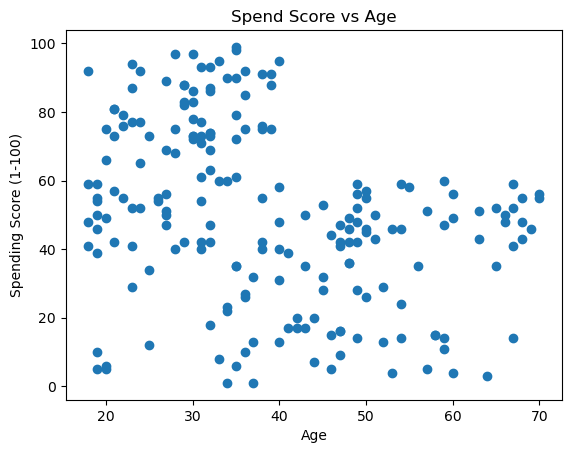

In [28]:
plt.scatter(data['Age'], data['Spending Score (1-100)'])
plt.title('Spend Score vs Age')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [33]:
y_scaler = MinMaxScaler()
data["Spending Score Scaled"] = y_scaler.fit_transform(y.values.reshape(-1, 1))

In [34]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),Spending Score Scaled
0,1,0,19,15,39,0.387755
1,2,0,21,15,81,0.816327
2,3,1,20,16,6,0.051020
3,4,1,23,16,77,0.775510
4,5,1,31,17,40,0.397959


In [35]:
x = data[['Age', 'Genre']]
y = data['Spending Score (1-100)']
y_scaled = data['Spending Score Scaled']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
modelselection = LinearRegression()
modelselection.fit(X_train, y_train)

LinearRegression()

In [38]:
y_predict = modelselection.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [40]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 17.952272491545358
Mean Squared Error: 465.21066801099175
R-squared Score: 0.05682696453857794


In [41]:
X_train, X_test, y_train_scaled, y_test_scaled = train_test_split(x, y_scaled, test_size=0.2, random_state=42)

In [49]:
modelselection.fit(X_train, y_train_scaled)
y_predict = modelselection.predict(X_test)

In [50]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

In [51]:
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Absolute Error: 43.38044734275138
Mean Squared Error: 2373.412507606544
R-squared Score: -3.8118816551912733
